# **Estimativa da _função custo total_**<br>Modelo de Regressão Polinomial
**Pedro Avelino**
<br>_M.Sc. in Economics_
<br><img src="https://cdn-icons-png.flaticon.com/256/174/174857.png" width="13" height="13"> [LinkedIn](https://www.linkedin.com/in/pedro-avsm)
<br><img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width='13' height='13'> [GitHub](https://github.com/pedroavsm) 

### **Apresentação**


Este exercício replica a utilização da _regressão polinomial_ para estimar a função de custo total, apresentado em Gujarati (Exemplo 7.4 - Econometria Básica, 5 ed., pag 226). 

Neste exercício, utilizaremos as bibliotecas `pandas` e `statsmodels` para análise e regressão, e as bibliotecas `seaborn` e `matplotlib.pyplot` para visualização dos dados.

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

---
### **Dados**
O arquivo `Tabela 7.4 - Custo total e Produção.xlsx` fornece dados de produção e custo total para 10 períodos.
<br>Estes dados são fictícios e foram disponibilizados pelo autor no livro. O arquivo está disponível no diretório.

In [2]:
# Dados
custo = pd.read_excel('Tabela 7.4 - Custo total e Produção.xlsx')
custo.head()

,Produção,Custo total (em $)
0,1,193
1,2,226
2,3,240
3,4,244
4,5,257


#### **Visualização**

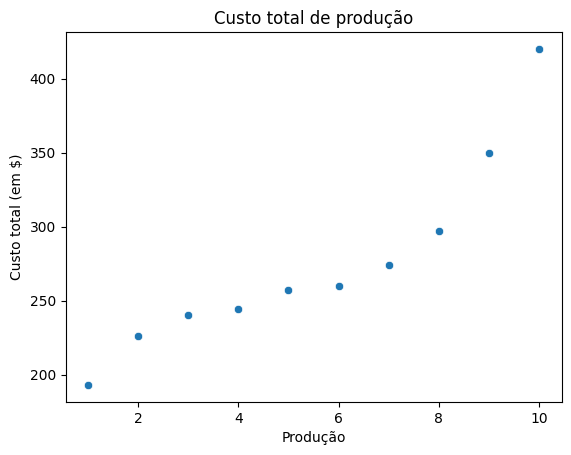

In [3]:
# Custo total - scatterplot
sns.scatterplot(x='Produção',y='Custo total (em $)',data=custo)
plt.title('Custo total de produção')
plt.show()

Pode-se perceber que οs pontos "desenham" a função de custo.
<br>A tarefa aqui não é simplesmente rodar uma regressão simples e interpretar seus resultados, mas especificar corretamente a função custo total e só então aplicar a regressão.

Vamos visualizar os dados no gráfico de linhas para uma melhor percepção da função custo.

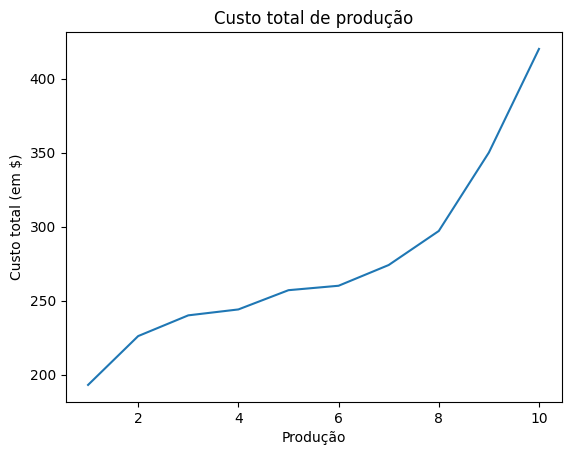

In [4]:
# Custo total - lineplot
plt.plot(custo['Produção'],custo['Custo total (em $)'])
plt.title('Custo total de produção')
plt.xlabel(custo.columns[0])
plt.ylabel(custo.columns[1])
plt.show()


Verifica-se aqui que o custo obedece à **lei de rendimentos decrescentes** - à medida que a produção aumenta, o incremento no custo total é cada vez menor (até certo ponto). Depois o custo aumenta de maneira mais acelerada, como previsto pela teoria microeconômica.

O formato apresentado pelos dados de custo total se aproxima de uma função cúbica ou polinomial de terceiro grau: $y = \alpha + \sum_{i=1}^3{\beta_kx^k}$.

---
### **Modelo**

Como dito anteriormente, a função custo tem um formato polinomial de terceiro grau. Portanto, o seguinte modelo cúbico pode ser capaz de capturar a forma do custo.

O modelo:

$$ Y_i = \beta_0 + \beta_1X_i + \beta_2X_i^2 + \beta_3X_i^3

Para aplicação do modelo, entretanto, faz-se necessário ajustar os dados para que contenham uma coluna para o $Custo$, $(Custo)^2$ e $(Custo)^3$.

In [5]:
# Ajuste nos dados
data = custo.rename(columns={'Produção':'X','Custo total (em $)':'Y'})
X2 = []; X3 = []
for i in data['X']:
    x2 = i**2; x3 = i**3
    X2.append(x2); X3.append(x3)

data['X2'] = X2; data['X3'] = X3
data.head()

,X,Y,X2,X3
0,1,193,1,1
1,2,226,4,8
2,3,240,9,27
3,4,244,16,64
4,5,257,25,125


In [6]:
# Model 
model_fit = ols(formula='Y ~ X + X2 + X3',
                data=data).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1202.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.00e-08
Time:                        10:22:16   Log-Likelihood:                -23.529
No. Observations:                  10   AIC:                             55.06
Df Residuals:                       6   BIC:                             56.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    141.7667      6.375     22.237      0.0

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---
### **Resultados e análises**

Modelo estimado:

$$
\hat{Y_i} = 141.7667 +63.4777X_i -12.9615X^2_i +0.9396X^3_i
$$
 
- $\beta_0 = 141.7667$: <br>Se a produção é zero, o custo total é de 141,7. <br>Esse é o <font color='darkred'>**custo fixo**</font>. <br>O custo que permanece mesmo quando não produção: aluguéis, energia, etc.

- $\beta_1 = 63.4777$
- $\beta_2 = -12.9615$
- $\beta_3 = 0.9396$

- $R^2 = 0.998$: <br>Indica que 99,8% da variação de $Y$ pode ser explicado por $X$, $X^2$ e $X^3$. 

#### Correlação
É importante notar (_e o nobre leitor já deve ter percebido_) que existe uma alta correlação entre os regressores. A nota [2] do resultado de regressao alerta sobre isso: `This might indicate that there are strong multicollinearity or other numerical problems.`.

O alerta indica que <font color='grey'>_pode haver_</font> **multicolinearidade forte** por conta da **forte correlação** observada.
<br>Observe abaixo a matriz de correlação:

           X        X2        X3
X   1.000000  0.974559  0.928391
X2  0.974559  1.000000  0.987180
X3  0.928391  0.987180  1.000000


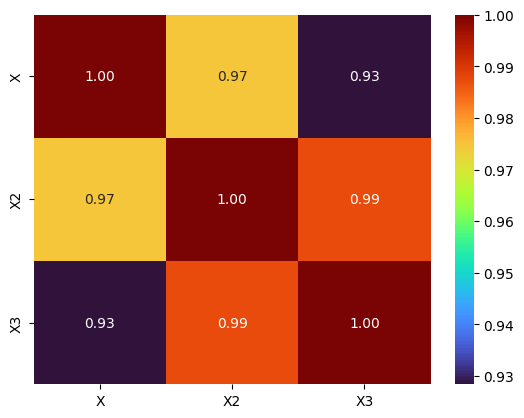

In [7]:
print(data[['X','X2','X3']].corr())
sns.heatmap(data[['X','X2','X3']].corr(), annot=True, fmt='.2f', cmap='turbo')
plt.show()

A correlação já era esperada, afinal. Todos os regressores são funções da mesma variável.

Entretanto, essa alta correlação não pode implicar multicolinearidade porque **a relação entre os regressores não é linear**: $x^a$ é uma <ins>função não linear</ins> de $x$.

Além disso, esta especificação polinomial é <ins>linear nos parâmentros</ins>. Portanto, podemos estimar a função custo normalmente sem maiores preocupações.
<br>Abaixo a função custo estimada.

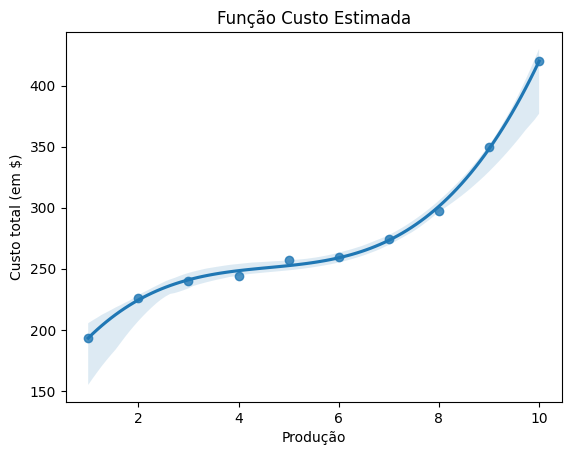

In [8]:
# Plot função custo total
sns.regplot(data=custo, x='Produção',y='Custo total (em $)', order=3)
plt.title('Função Custo Estimada')
plt.show()

#### **Custo marginal e Custo médio**

A partir da curva estimada de custo total podemos extratir outras funções de custo relevantes:

$$ \tag{Custo total = custo fixo + custo variável} CT = CF + CV$$

$$\tag{Custo marginal} Cmg = \partial CT/\partial q$$

$$\tag{Custo fixo médio} CFme = CF/q$$

$$\tag{Custo variável médio} CVme = CV/q$$

$$\tag{Custo total médio} CTme = CT/q = CFme + CVme$$

No modelo polinomial estimado, a função custo é dada por $Y$; e quantidade é dada por $X$.
<br>Portanto, feitas as devidas substituições, é fácil obter todas estas curvas.

In [9]:
model_fit.params

Intercept    141.766667
X             63.477661
X2           -12.961538
X3             0.939588
dtype: float64

In [10]:
β0 = model_fit.params['Intercept']
β1 = model_fit.params['X']
β2 = model_fit.params['X2']
β3 = model_fit.params['X3']

def ave_cost(x): # Average cost (or Total average cost)
    return β0/x + β1 + β2*x + β3*x**2

def ave_var_cost(x): # Average variable cost
    return β1 + β2*x + β3*x**2

def marg_cost(x): # Marginal cost
    return β1 +2*β2*x + 3*β3*x**2



C:\Users\pedro\AppData\Local\Temp\ipykernel_676\444783665.py:7: RuntimeWarning: divide by zero encountered in divide
  return β0/x + β1 + β2*x + β3*x**2


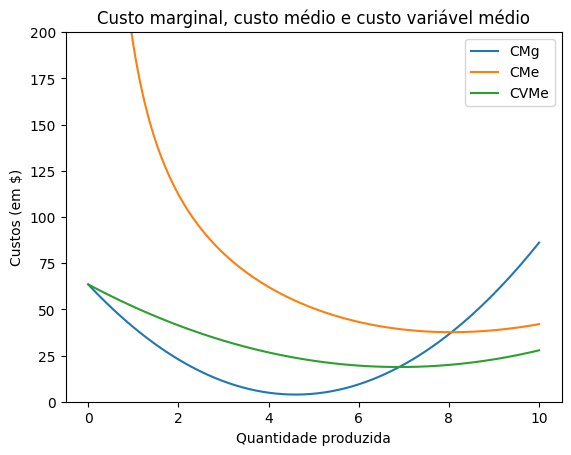

In [11]:
from numpy import linspace
x = linspace(0,10,200)

plt.plot(x, marg_cost(x), label='CMg')
plt.plot(x, ave_cost(x), label='CMe')
plt.plot(x, ave_var_cost(x), label='CVMe')
plt.ylim(0,200)
plt.title('Custo marginal, custo médio e custo variável médio')
plt.xlabel('Quantidade produzida')
plt.ylabel('Custos (em $)')
plt.legend()
plt.show()


---
### Considerações finais

Ainda é possível prosseguir com a análise de custos com essas funções, analisando as relações entre elas. 

Entretanto, a sugestão é passar para outras bases de dados - _livros de microeconomia fequentemente fornecem dados e tabelas para exercícios_.